In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
base_site ="https://en.wikipedia.org/wiki/Cairo_University"
r = requests.get(base_site)

In [ ]:
html_content = r.text
print(html_content)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Cairo University - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vect

In [ ]:
# Extract text
soup = BeautifulSoup(html_content, 'html.parser')
text = soup.get_text()
text = text.strip()
text = text.replace('\n', ' ')
text = re.sub(r'\s+', ' ', text)
print(text)

Cairo University - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn to editCommunity portalRecent changesUpload file Search Search Create account Log in Personal tools Create account Log in Pages for logged out editors learn more ContributionsTalk Contents move to sidebar hide (Top) 1History 2Foundation 3Challenges to foundation 4Ranking 5Structure 6New Central Library 7Notable alumni Toggle Notable alumni subsection 7.1Nobel laureates 8See also 9References 10Further reading 11External links Toggle the table of contents Cairo University 57 languages العربيةAsturianuتۆرکجهবাংলাБашҡортсаБеларускаяБългарскиCatalàCebuanoČeštinaDeutschEestiΕλληνικάEspañolEsperantoEuskaraفارسیFrançais한국어ՀայերենHrvatskiBahasa IndonesiaItalianoעבריתქართულიҚазақшаKurdîLatinaമലയാളംمصرىBahasa MelayuMinangkabauNederlandsनेपाली日本語Norsk bokmålNorsk nynorskਪੰਜਾਬੀپنجابیPolskiPortuguêsРусскийکو

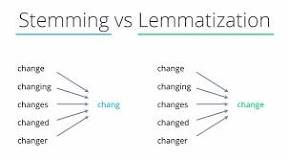

In [ ]:
from nltk.corpus import brown
def preprocess_text(text):
    tokens = word_tokenize(text)

    english_words = set(w.lower() for w in brown.words())
    tokens = [word for word in tokens if word.lower() in english_words]

    # tokens = [word.lower() for word in tokens]

    # Remove punctuation and non-alphabetic characters that are not letters (a-z, A-Z).
    tokens = [word for word in tokens if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens]

    return tokens

In [ ]:
tokens = preprocess_text(text)
print(tokens)

['cairo', 'university', 'jump', 'content', 'main', 'menu', 'main', 'menu', 'move', 'hide', 'navigation', 'main', 'contribute', 'file', 'search', 'search', 'create', 'account', 'log', 'personal', 'tool', 'create', 'account', 'log', 'page', 'logged', 'editor', 'learn', 'content', 'move', 'hide', 'top', 'foundation', 'central', 'library', 'alumnus', 'notable', 'alumnus', 'subsection', 'also', 'reading', 'link', 'table', 'content', 'cairo', 'university', 'language', 'edit', 'link', 'english', 'history', 'tool', 'tool', 'move', 'hide', 'action', 'history', 'general', 'what', 'link', 'shortened', 'item', 'version', 'in', 'project', 'common', 'coordinate', 'from', 'free', 'encyclopedia', 'public', 'university', 'egypt', 'cairo', 'university', 'i', 'year', 'ago', 'academic', 'al', 'cairo', 'university', 'cairo', 'university', 'arabic', 'egypt', 'premier', 'public', 'university', 'it', 'main', 'campus', 'immediately', 'across', 'nile', 'cairo', 'it', 'founded', 'december', 'housed', 'various', 

In [ ]:

unique_words = set(tokens)
print(unique_words)

{'cohen', 'external', 'alumnus', 'inside', 'what', 'this', 'began', 'foreign', 'kenneth', 'partisan', 'ceremony', 'collaboration', 'received', 'represented', 'added', 'bureaucrat', 'figure', 'natural', 'patronage', 'emerged', 'stressed', 'germany', 'teacher', 'suez', 'ignazio', 'period', 'president', 'providing', 'union', 'highest', 'apply', 'finally', 'top', 'abbas', 'structure', 'unrest', 'fear', 'joined', 'included', 'rated', 'last', 'constituent', 'institution', 'stated', 'location', 'george', 'twice', 'english', 'decision', 'view', 'territory', 'introduced', 'ad', 'opened', 'large', 'mali', 'ability', 'made', 'church', 'conference', 'therapist', 'article', 'fulfill', 'contact', 'across', 'legal', 'minister', 'scott', 'administrative', 'historian', 'king', 'judicial', 'study', 'toward', 'messina', 'deutsche', 'mari', 'constitutional', 'tokyo', 'leiden', 'historical', 'malta', 'bell', 'shaker', 'prize', 'teaching', 'played', 'pledged', 'rhodes', 'he', 'mgm', 'create', 'judge', 'huma

In [ ]:
[word for word in unique_words if len(word)<3]

['ad',
 'he',
 'le',
 'go',
 'la',
 'of',
 'b',
 'al',
 'du',
 'de',
 'on',
 'in',
 'tv',
 'by',
 'i',
 'at',
 'it',
 'et',
 'v',
 'el',
 'no',
 'up',
 'un',
 'a']